# MFDS Assignment - 2 | Question - 1
## Transitive Closure - Naive vs Warshall's Algorithm


Write a code in Python for Naïve and Warshall’s algorithm for **finding the transitive closure** for the given relation. Use random matrices of order 10 to 100 and compare the time taken by **Naïve method and Warshall’s Algorithm.** 

Show the **log plot of the time taken** and determine the order

In [1]:
# Import of Libraries

import random
import datetime

# For visualizations
import matplotlib.pyplot as plt
%matplotlib inline

### This section will deal with user defined functions

***The program asks us to generate random matrices of various orders***

In [2]:
def generate_random_matrix(n, weight):
    """
    General Function to create random random matrices of order 10 to 100, with values 0 or 1.
    
    Returns - This functions returns the randomly generated matrix
    """
    elements_list = [0, 1]
    matrix = [random.choices(elements_list, weights = (100 - weight, weight), k = n) for x in range(n)]
    return matrix

***Function to print solution matrix***

In [3]:
def print_matrix(output_matrix, n, f):
    """
    This function will print the solution matrix
    """
    for index in range(n):
        for inner_index in range(n):
            print('1%d' %(output_matrix[index][inner_index]), end = "", file = f)
        print("", file = f)

***Function for Matrix Operations For Naive and Warshall***

In [4]:
def matrix_ops(input_matrix_1, input_matrix_2, n):
    """
    Function to perform matrix operations for Both Naive abd Warshall's algorithm
    
    Returns - This function returns the output matrix
    """
    output_matrix = [i[: ]for i in input_matrix_1]
    for k in range(n):
        for i in range(n):
            output_matrix[k][i] = 0;
            for j in range(n):
                output_matrix[k][i] = (input_matrix_1[k][i]) or (input_matrix_2[k][i]) or (output_matrix[k][i]) or(input_matrix_1[k][j] and input_matrix_2[j][i])
    return output_matrix

***Function to calculate Naive Transitive Closure***

In [5]:
def naive_transitive_closure(input_matrix, n):
    """
    Function to calculate transitive closure using naive approach
    
    Returns - Output matrix which has the elements for transitive closure
    """
    a = input_matrix
    b = matrix_ops(a, a, n)
    for k in range(n - 1):
        b = matrix_ops(b, a, n)
    output_matrix = b
    return output_matrix

***Function to calculate Floyd Warshall Algorithm***

In [6]:
def warshall_transitive_closure(input_matrix, n):
    """
    Function to calculate transitive closure using Warshall Algorithm
    
    Returns - Output matrix which has the elements for transitive closure
    """
    output_matrix = [i[: ]for i in input_matrix]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                output_matrix[i][j] = output_matrix[i][j] or(output_matrix[i][k] and output_matrix[k][j])
    return output_matrix

### Main Program Begins

***Variables used for execution plots abd visualizations***

In [7]:
x = []
y = []
r = []

The main program begins here

The main program has **three** parts<br><br>
**--Random matrix generation**<br>
**--Transitive Closure using Naive Approach**<br>
**--Transitive Closure using Warshall Approach**

In [8]:
with open('matrix_output.txt', 'w') as f:
    weight = 3
    n_start = 10
    range_1 = 91
    operation_start = datetime.datetime.now()
    
    print("Random Generated Input Matrix", file = f)
    for p in range(range_1):
        
        # Random Matrix generation using the previously defined function
        n = n_start + p
        x.append(n)
        input_matrix = generate_random_matrix(n, weight)
        f.write("\n")
        print("Process Number : ", n - 9, " ", n, "x", n, " Matrix", file = f)
        print_matrix(input_matrix, n, f)
        
        # Transitive Closure using Naive Approach
        naive_closure_start = datetime.datetime.now()
        naive_closure = naive_transitive_closure(input_matrix, n)
        naive_closure_end = datetime.datetime.now()
        naive_time_taken = naive_closure_end - naive_closure_start
        r.append(naive_time_taken.total_seconds() * 1000 + naive_time_taken.microseconds / 1000)
        print("Output of Naive’s algorithm - Transitive closure", file = f)
        print_matrix(naive_closure, n, f)
       
        # Transitive Closure using Warshall Approach
        warshall_closure_start = datetime.datetime.now()
        warshall_closure = warshall_transitive_closure(input_matrix, n)
        warshall_closure_end = datetime.datetime.now()
        warshall_time_taken = warshall_closure_end - warshall_closure_start
        y.append(warshall_time_taken.total_seconds() * 1000 + warshall_time_taken.microseconds / 1000)
        print("Output of Warshall’s algorithm - Transitive closure", file = f)
        print_matrix(warshall_closure, n, f)
        
        print('Warshall’s Output Matrix and Naive’s Output Matrix Match :- ', naive_closure == warshall_closure, file = f)

operation_end = datetime.datetime.now()
print(f"Total time taken - {operation_end - operation_start}")

Total time taken - 0:03:45.283318


### Data Visualization

#### Execution Time vs Matrix Size Visualizations

In [9]:
plt.rcParams["figure.figsize"] = (14, 8)

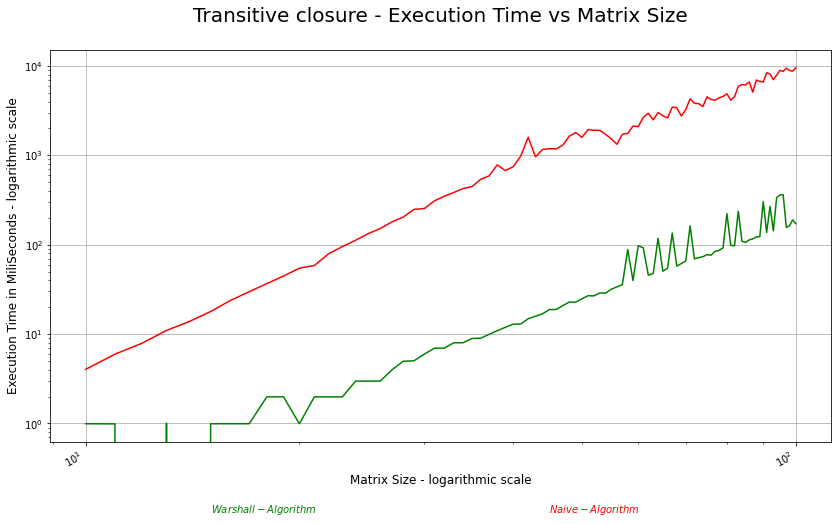

In [10]:
# Setting up the visuaLization elements
plt.plot(x, y, 'green', x, r, 'red')
plt.xscale('log')
plt.yscale('log')
plt.title('Transitive closure - Execution Time vs Matrix Size\n', fontsize = 20)

plt.xlabel('Matrix Size - logarithmic scale', fontsize = 12)
plt.ylabel('Execution Time in MiliSeconds - logarithmic scale', fontsize = 12)# beautify the x - labels
plt.text(15, 0.1, '$Warshall-Algorithm$', color = 'green')
plt.text(45, 0.1, '$Naive-Algorithm$', color = 'red')
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

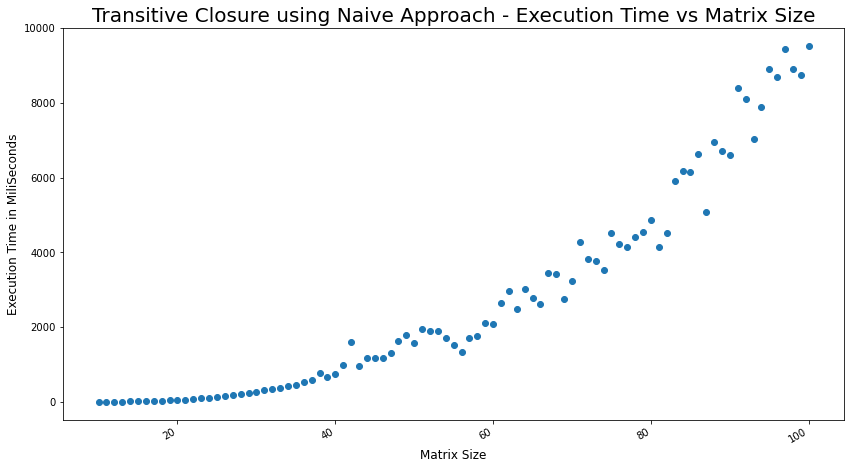

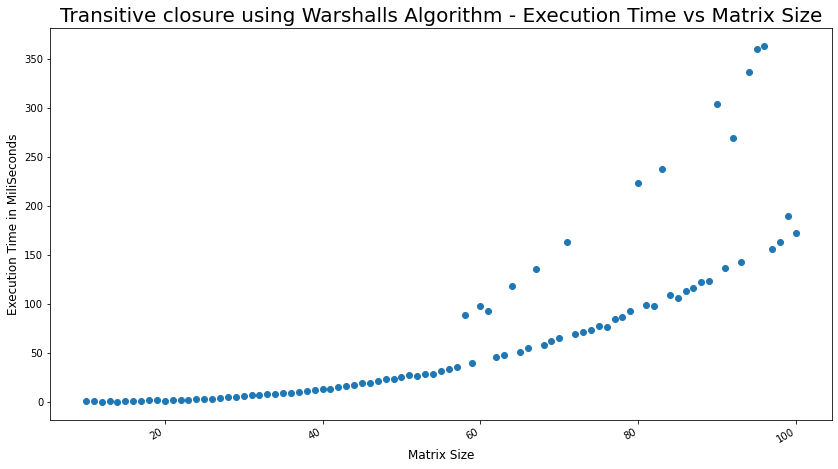

In [11]:
# Plot for Naive Approach
plt.scatter(x, r)
plt.title('Transitive Closure using Naive Approach - Execution Time vs Matrix Size', fontsize = 20)
plt.xlabel('Matrix Size', fontsize = 12)
plt.ylabel('Execution Time in MiliSeconds', fontsize = 12)
plt.gcf().autofmt_xdate()
plt.show()

# Plot for the Warshall Approach
plt.scatter(x, y)
plt.title('Transitive closure using Warshall''s Algorithm - Execution Time vs Matrix Size', fontsize = 20)
plt.xlabel('Matrix Size', fontsize = 12)
plt.ylabel('Execution Time in MiliSeconds', fontsize=12)
plt.gcf().autofmt_xdate()
plt.show()

We see that the Naive algorithm is much inefficient that Warshall’s Algorithm. So the order of time difference increases from approx 12.75 to 90.5 from 10X10 matrix to 100X100 matrix.

**10 X 10 Random Matrix
Time taken by Naive method - 0:00:00.001492<br>
Time taken by Warshall method - 0:00:00.000117**

**100 X 100 Random Matrix
Time taken by Naive method - 0:00:06.364066<br>
Time taken by Warshall method - 0:00:00.070316**

As mentioned the operation count for Naive method is **2n3(n - 1) and for Warshall method is 2n3**. Our observation matches - for n = 10 the time difference is almost 10 (n times) and when n = 100 the time difference is almost 100 (n times).